### Imports

In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Load Dataset

In [557]:
df = pd.read_csv('../data/gym_members_exercise_tracking.csv')

In [558]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [559]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [560]:
# check value counts for categorical data
df[['Gender']].value_counts()

Gender
Male      511
Female    462
Name: count, dtype: int64

In [561]:
df[['Workout_Type']].value_counts()

Workout_Type
Strength        258
Cardio          255
Yoga            239
HIIT            221
Name: count, dtype: int64

In [562]:
df[['Experience_Level']].value_counts()

Experience_Level
2                   406
1                   376
3                   191
Name: count, dtype: int64

In [563]:
# Data Cleaning
# 1. handling null values
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

### Combine Redundant Columns and Remove Unnecessary Columns

In [564]:
# combine fields Session_Duration (hours) and Workout_Frequency (days/week)
df['Hours_Trained_Per_Week'] = df['Session_Duration (hours)'] * df['Workout_Frequency (days/week)']


# drop unnecessary columns
df = df.drop(columns=['Workout_Frequency (days/week)', 'Session_Duration (hours)', 'Weight (kg)', 'Height (m)'])

df.head()

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Experience_Level,BMI,Hours_Trained_Per_Week
0,56,Male,180,157,60,1313.0,Yoga,12.6,3.5,3,30.20,6.76
1,46,Female,179,151,66,883.0,HIIT,33.9,2.1,2,32.00,5.20
2,32,Female,167,122,54,677.0,Cardio,33.4,2.3,2,24.71,4.44
3,25,Male,190,164,56,532.0,Strength,28.8,2.1,1,18.41,1.77
4,38,Male,188,158,68,556.0,Strength,29.2,2.8,1,14.39,1.92


### Visualizing Outliers and Correlations

<Axes: xlabel='Hours_Trained_Per_Week'>

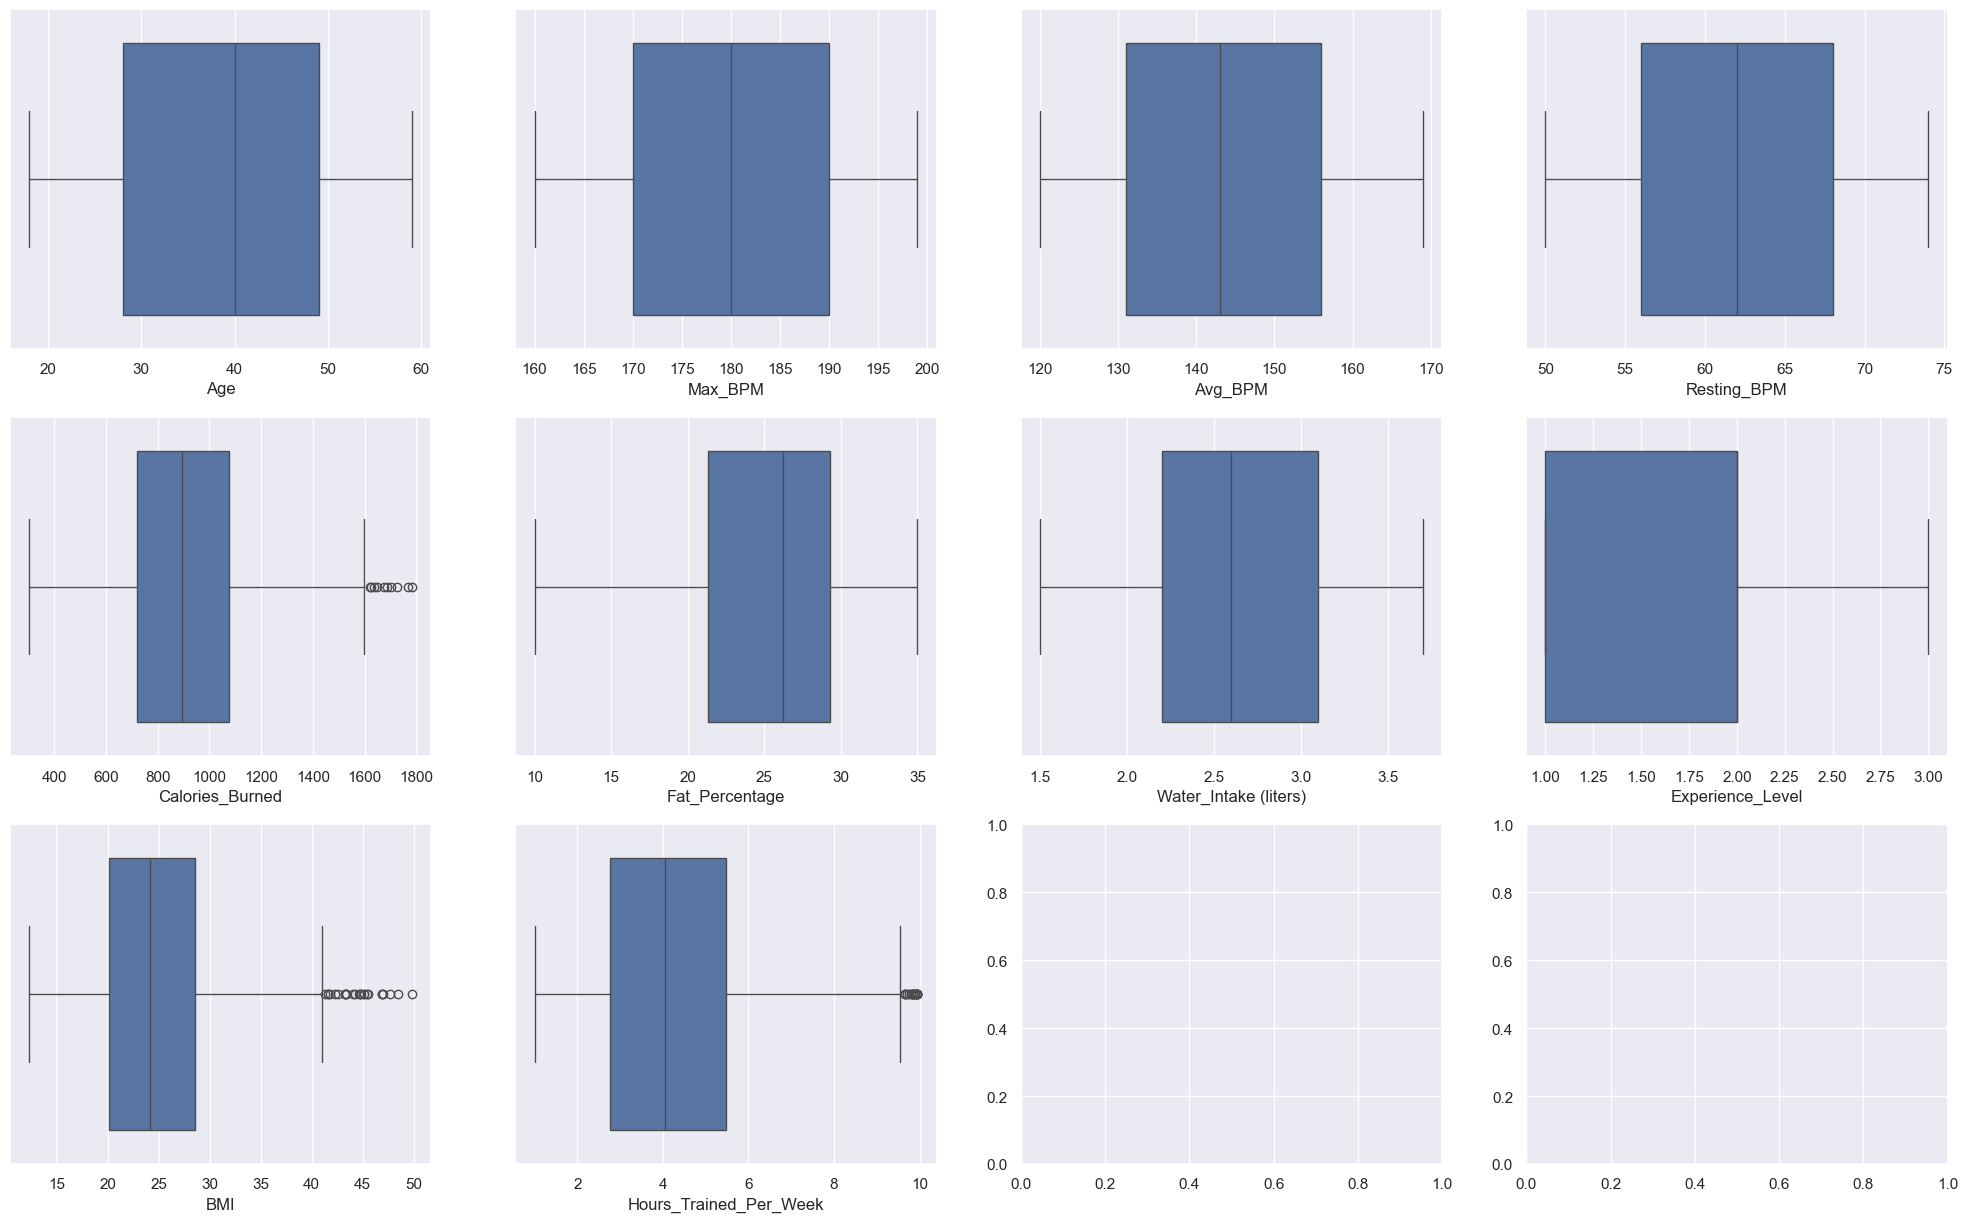

In [565]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25,15))
sns.boxplot(x=df["Age"], ax=axs[0,0])
sns.boxplot(x=df["Max_BPM"], ax=axs[0,1])
sns.boxplot(x=df["Avg_BPM"], ax=axs[0,2])
sns.boxplot(x=df["Resting_BPM"], ax=axs[0,3])
sns.boxplot(x=df["Calories_Burned"], ax=axs[1,0])
sns.boxplot(x=df["Fat_Percentage"], ax=axs[1,1])
sns.boxplot(x=df["Water_Intake (liters)"], ax=axs[1,2])
sns.boxplot(x=df["Experience_Level"], ax=axs[1,3])
sns.boxplot(x=df["BMI"], ax=axs[2,0])
sns.boxplot(x=df['Hours_Trained_Per_Week'], ax=axs[2,1])


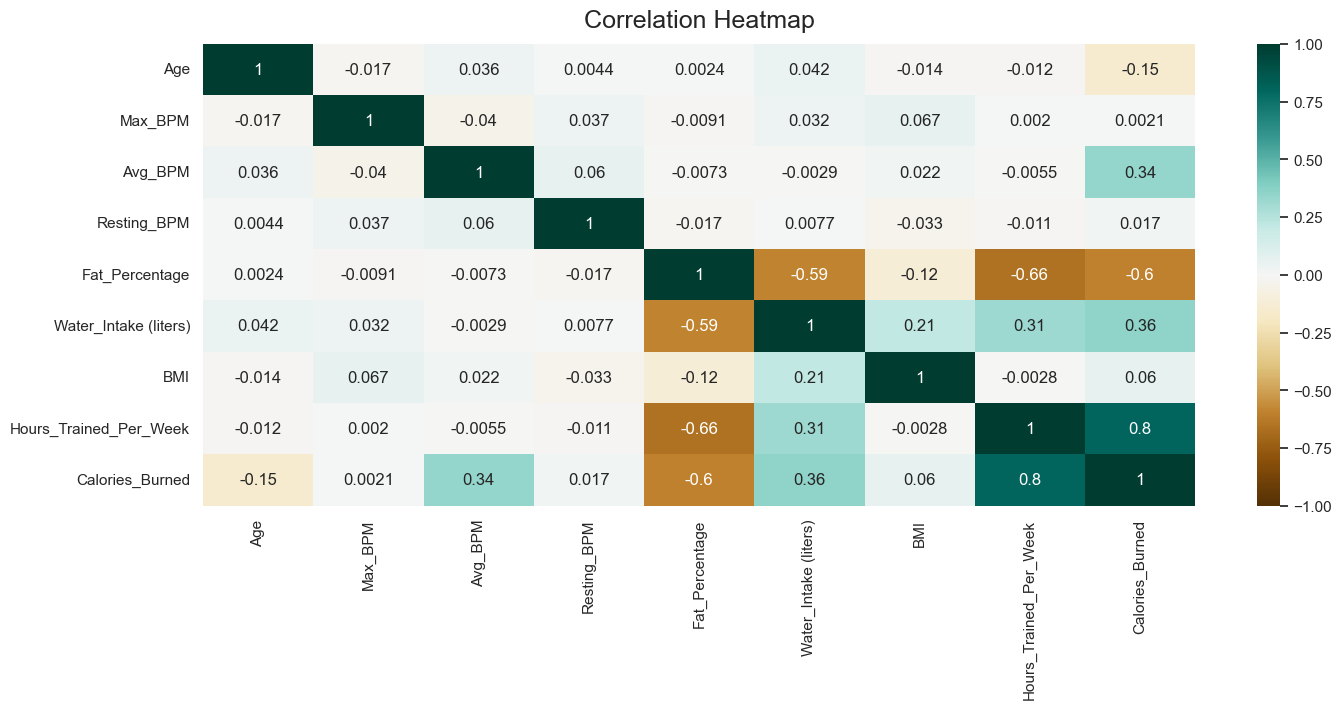

In [566]:
# Finding Correlation between columns
corr = df[['Age', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Fat_Percentage', 'Water_Intake (liters)', 'BMI', 'Hours_Trained_Per_Week','Calories_Burned']].corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr,vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

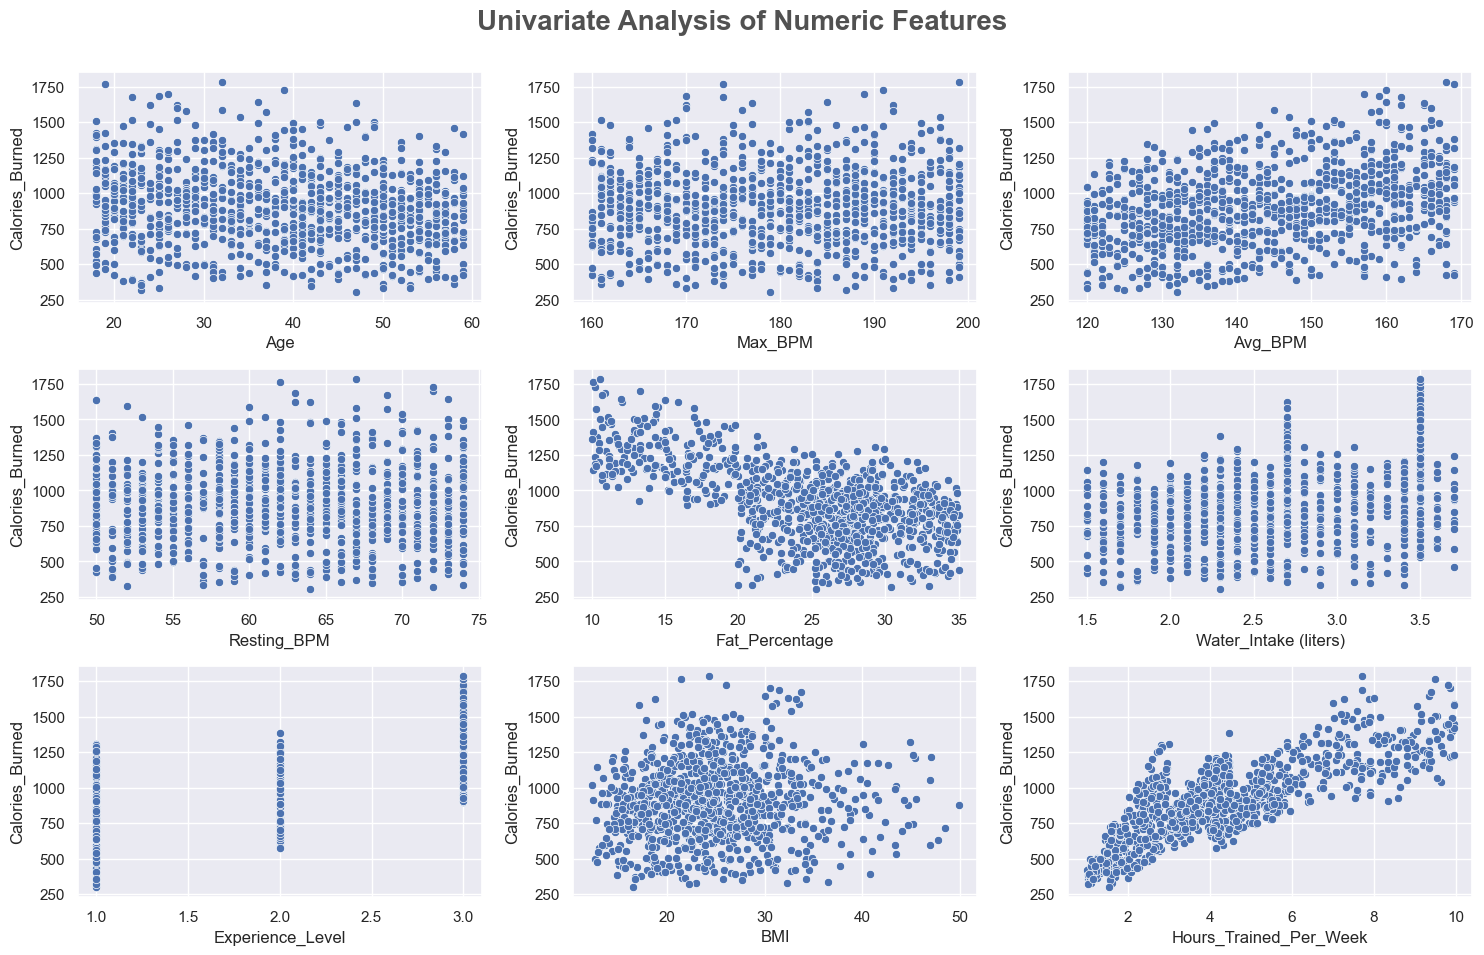

In [567]:
# Proportion of count data on categorical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numeric Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numerical_features = ['Age', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Fat_Percentage', 'Water_Intake (liters)', 'Experience_Level', 'BMI', 'Hours_Trained_Per_Week']
for i in range(0, len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=df[numerical_features[i]],y=df['Calories_Burned'])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### Splitting Data

In [568]:
# Split data into X and y
X = df.drop(columns=['Calories_Burned'], axis=1)
y = df['Calories_Burned']

# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=147)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(681, 11) (292, 11) (681,) (292,)


### Feature Selection Based on Correlation Matrix

In [569]:
# Feature selection 
features_to_drop = ['Gender', 'Max_BPM', 'Age', 'Resting_BPM', 'Water_Intake (liters)']

X_train.drop(columns=features_to_drop, axis=1, inplace=True)
X_test.drop(columns=features_to_drop, axis=1, inplace=True)
X_train.head()

,Avg_BPM,Workout_Type,Fat_Percentage,Experience_Level,BMI,Hours_Trained_Per_Week
13,136,HIIT,27.6,1,23.62,3.54
834,140,Cardio,26.0,2,23.80,4.20
853,167,HIIT,25.4,2,28.56,3.21
249,129,Cardio,27.5,1,15.24,1.86
18,146,Strength,32.8,2,21.81,3.39


### Label Encoding Categorical Data

In [570]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['Workout_Type'] = le.fit_transform(np.ravel(X_train[['Workout_Type']]))
X_test['Workout_Type'] = le.transform(np.ravel(X_test[['Workout_Type']]))

In [571]:
# Change Data Types for categorical data
X_train['Workout_Type'].astype(int)
X_test['Workout_Type'].astype(int)
X_train['Experience_Level'].astype(int)
X_test['Experience_Level'].astype(int)

482    1
128    1
292    1
92     2
308    2
      ..
836    2
233    3
682    1
104    1
330    3
Name: Experience_Level, Length: 292, dtype: int64

In [572]:
# def oh_encode_data(data, columns):
#     oh = OneHotEncoder(drop='first')
#     concat_values = [data,]
#     for i in columns:
#         encoded_data = pd.DataFrame(oh.fit_transform(data[[i]]).toarray(), columns=[i], index=data.index,)
#         concat_values.append(encoded_data)
#     data.drop(columns=columns, axis=1, inplace=True)
#     data = pd.concat(concat_values, axis=1)
#     return data


# X_train = oh_encode_data(X_train, ['Gender'])
# X_test = oh_encode_data(X_test, ['Gender'])


In [573]:
df.head()

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Experience_Level,BMI,Hours_Trained_Per_Week
0,56,Male,180,157,60,1313.0,Yoga,12.6,3.5,3,30.20,6.76
1,46,Female,179,151,66,883.0,HIIT,33.9,2.1,2,32.00,5.20
2,32,Female,167,122,54,677.0,Cardio,33.4,2.3,2,24.71,4.44
3,25,Male,190,164,56,532.0,Strength,28.8,2.1,1,18.41,1.77
4,38,Male,188,158,68,556.0,Strength,29.2,2.8,1,14.39,1.92


### Standard Scaling Numerical Data

In [574]:
# Standard Scaling all the continuous variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['Avg_BPM','BMI', 'Fat_Percentage', 'Hours_Trained_Per_Week']

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[columns_to_scale]), 
                              columns=columns_to_scale, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[columns_to_scale]), 
                             columns=columns_to_scale, index=X_test.index)

X_train.drop(columns=columns_to_scale, axis=1, inplace=True)
X_test.drop(columns=columns_to_scale, axis=1, inplace=True)
X_train = pd.concat([X_train, X_train_scaled], axis=1)
X_test = pd.concat([X_test, X_test_scaled], axis=1)

X_train_scaled.shape


(681, 4)

In [575]:
X_train.head()

,Workout_Type,Experience_Level,Avg_BPM,BMI,Fat_Percentage,Hours_Trained_Per_Week
13,1,1,-0.529141,-0.169423,0.389113,-0.390844
834,0,2,-0.247951,-0.141851,0.128988,-0.085184
853,1,2,1.650082,0.587277,0.031441,-0.543673
249,0,1,-1.021223,-1.453055,0.372855,-1.168886
18,2,2,0.173834,-0.446675,1.234518,-0.460312


### Creating Evaluation Metric Functions

In [576]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def evaluate_model_test(y_train, y_pred):
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = float(np.sqrt(mse))
    r_square = r2_score(y_train, y_pred)
    
    return mae, rmse, r_square

def evaluate_model_train(true, pred, n, p):
    if n <= p:
        raise ValueError("Number of observations n must be greater than number of parameters p.")
    if len(true) != len(pred):
        raise ValueError("True and predicted values must have the same length.")
    
    r_square = r2_score(true, pred)

    if r_square >= 1.0:
        f_stat = float('inf')
        f_p_value = 0.0
    else:
        f_stat = float((r_square / p) / ((1-r_square) / (n-p)))
        f_p_value = float(1 - stats.f.cdf(f_stat, p, n-p))

    return f_stat, f_p_value, r_square


### Visualizing the best K Value for KNN

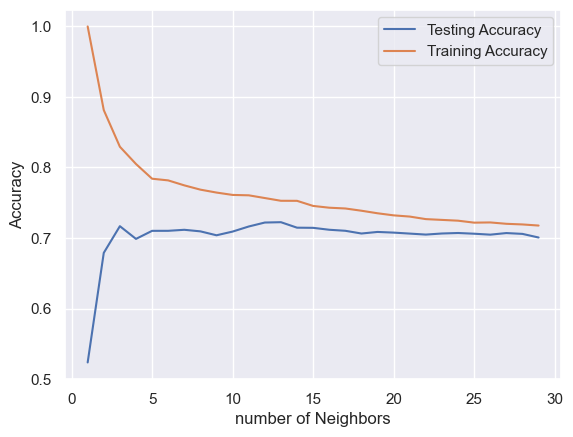

In [577]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = np.arange(1, 30)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn_model = KNeighborsRegressor(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  train_accuracy[i] = knn_model.score(X_train, y_train)
  test_accuracy[i] = knn_model.score(X_test, y_test)

sns.set()
sns.lineplot(x=neighbors, y=test_accuracy, label = 'Testing Accuracy')
sns.lineplot(x=neighbors, y=train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Visualizing the best max_depth value for Decision Tree

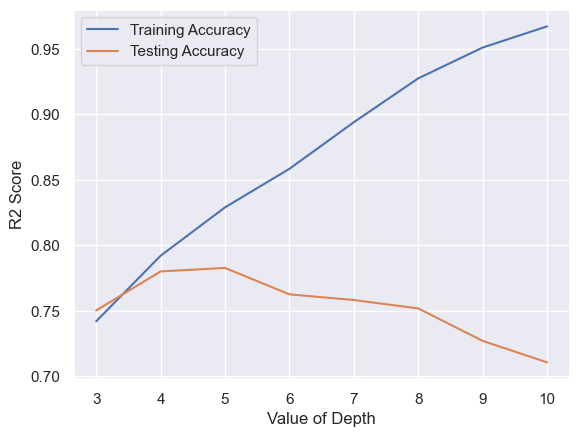

In [578]:
from sklearn import tree
depth = np.arange(3,11)
train_accuracy = []
test_accuracy = []
for i in range(3,11):
    model = tree.DecisionTreeRegressor(max_depth=i)
    model = model.fit(X_train, y_train)

    #Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    _, _, r2_square_train = evaluate_model_test(y_train, y_train_pred)
    _, _, r2_square_test = evaluate_model_test(y_test, y_test_pred)
    train_accuracy.append(r2_square_train)
    test_accuracy.append(r2_square_test)
    
sns.set()
sns.lineplot(x=depth, y=train_accuracy, label = 'Training Accuracy')
sns.lineplot(x=depth, y=test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Value of Depth')
plt.ylabel('R2 Score')
plt.show()

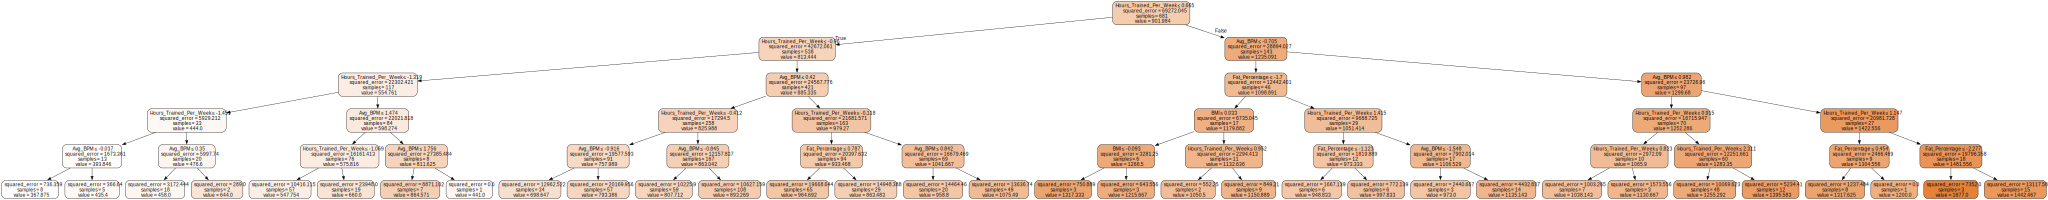

In [579]:
model = tree.DecisionTreeRegressor(max_depth=5)
model = model.fit(X_train, y_train)
import graphviz
from sklearn.tree import export_graphviz

# Build and render the tree graph
graph = graphviz.Source(export_graphviz(model, out_file=None, feature_names=X_train.columns, class_names=["Workout_Type", "Experience_Level", "Age", "BMI", "Fat_Percentage", "Hours_Trained_Per_Week"], filled=True, rounded=True, special_characters=True))
graph.render("decision_tree", format="png", cleanup=True)
graph



### Visualizing best parameters for Random Forest Regressor

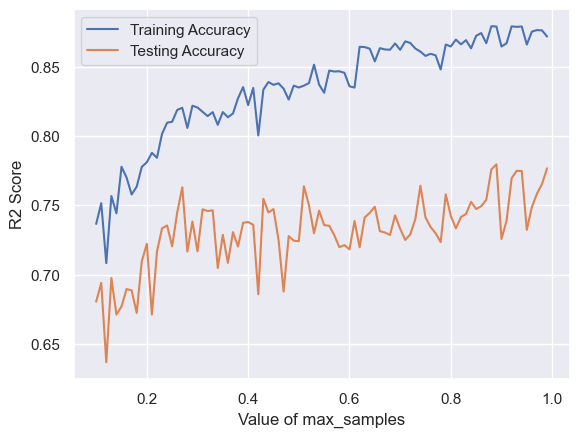

In [580]:
from sklearn.ensemble import RandomForestRegressor
estimators = np.arange(10,100)
estimators = [i/100 for i in estimators]
train_accuracy = []
test_accuracy = []
for i in range(10,100):
    model = RandomForestRegressor(n_estimators=4, max_depth=8, max_samples=i/100, max_features='sqrt', random_state=15)
    model = model.fit(X_train, y_train)

    #Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    _, _, r2_square_train = evaluate_model_test(y_train, y_train_pred)
    _, _, r2_square_test = evaluate_model_test(y_test, y_test_pred)
    train_accuracy.append(r2_square_train)
    test_accuracy.append(r2_square_test)
   
sns.set()
sns.lineplot(x=estimators, y=train_accuracy, label = 'Training Accuracy')
sns.lineplot(x=estimators, y=test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Value of max_samples')
plt.ylabel('R2 Score')
plt.show()

### Grid Search for Hyperparameter Tuning in SVM

In [581]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree': [2,3,4,8],'gamma' : ('auto','scale')}

model = SVR()

grids = GridSearchCV(model, param, cv=5)

grids.fit(X_train, y_train)

print(grids.best_params_)
print(grids.best_score_)

{'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
0.7623725521787279


### Pipeline for Training Multiple Models

In [582]:
from sklearn.linear_model import LinearRegression

# Model training
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=30),
    'Decision Tree Regressor': tree.DecisionTreeRegressor(max_depth=5, ),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=4, 
                                                     max_depth=8, 
                                                     max_samples=0.15,
                                                     max_features='sqrt',
                                                     random_state=15
                                                    ),
    'SVR': SVR(kernel='linear', C=10, degree=2, gamma='auto')
}

model_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    #Training
    model.fit(X_train, y_train)

    #Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    f_stat, f_p_value, r2_square_train = evaluate_model_train(y_train, y_train_pred, 
                                             X_train.shape[0], X_train.shape[1])
    mae, rmse, r2_square_test = evaluate_model_test(y_test, y_test_pred)
    
    model_list.append({
        "ModelName": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score Train": r2_square_train,
        "R2 Score Test": r2_square_test,
        "F-Statistic": f_stat,
        "P-Value for F-Stat": f_p_value,
    })
    

### Pipeline for Polynomial Regression

In [583]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
for i in range(2,4):
    poly = PolynomialFeatures(degree=i, include_bias=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    regression = LinearRegression()
    #Training
    regression.fit(X_train_poly, y_train)

    #Prediction
    y_train_pred = regression.predict(X_train_poly)
    y_test_pred = regression.predict(X_test_poly)

    f_stat, f_p_value, r2_square_train = evaluate_model_train(y_train, y_train_pred, 
                                             X_train_poly.shape[0], X_train_poly.shape[1])
    mae, rmse, r2_square_test = evaluate_model_test(y_test, y_test_pred)

    model_list.append({
        "ModelName": f'Polynomial Regression (degree = {i})',
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score Train": r2_square_train,
        "R2 Score Test": r2_square_test,
        "F-Statistic": f_stat,
        "P-Value for F-Stat": f_p_value,
    })

In [584]:
metrics_data = pd.DataFrame(model_list)
metrics_data

,ModelName,MAE,RMSE,R2 Score Train,R2 Score Test,F-Statistic,P-Value for F-Stat
0,Linear Regression,110.819282,137.305143,0.770924,0.780248,378.602638,1.110223e-16
1,KNN Regressor,130.943265,160.654231,0.715625,0.699155,283.104897,1.110223e-16
2,Decision Tree Regressor,110.295949,136.541526,0.828917,0.782686,545.074330,1.110223e-16
3,Random Forest Regressor,135.581443,166.484805,0.777787,0.676922,393.771680,1.110223e-16
4,SVR,111.895015,139.155859,0.768479,0.774285,373.416271,1.110223e-16
5,Polynomial Regression (degree = 2),98.507624,121.376179,0.809658,0.828278,99.202138,1.110223e-16
6,Polynomial Regression (degree = 3),97.087017,120.568520,0.837461,0.830556,36.618681,1.110223e-16


### Visualizing Testing Metrics for all models

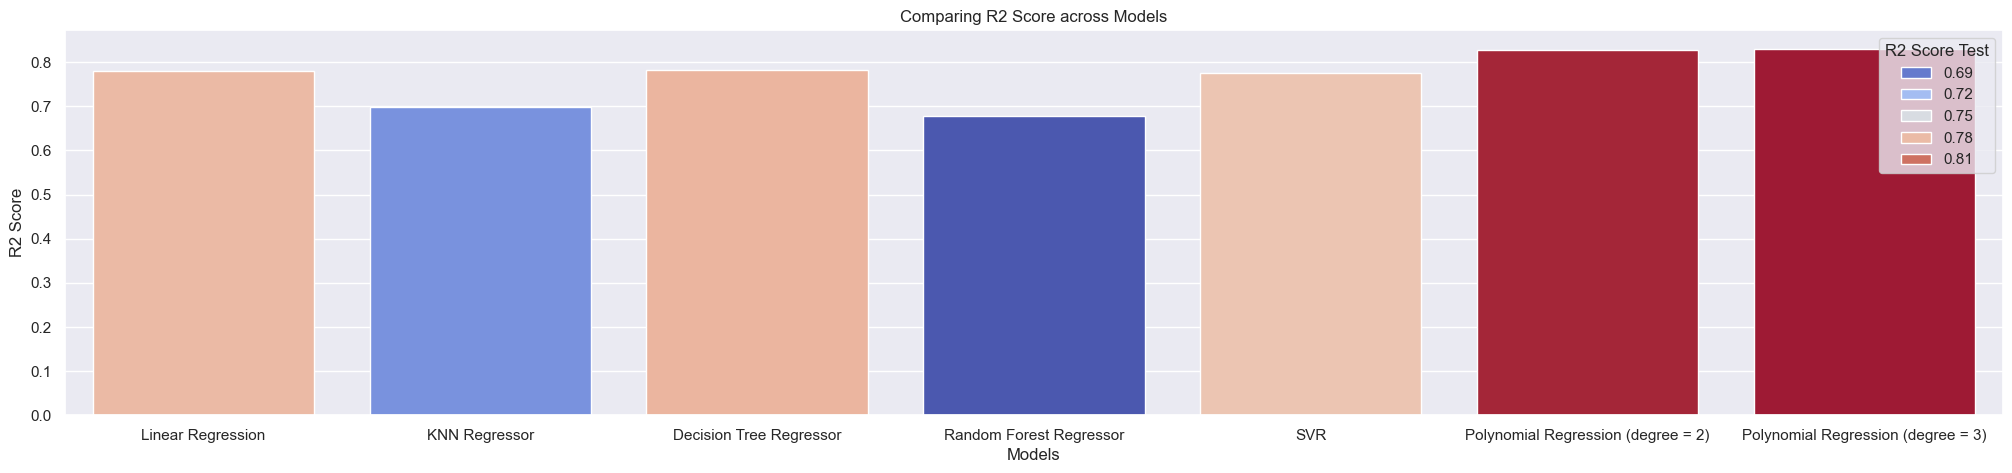

In [585]:
plt.figure(figsize=(25,5))
plot = sns.barplot(metrics_data, x='ModelName', y='R2 Score Test', hue='R2 Score Test', palette="coolwarm")
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("Comparing R2 Score across Models")
plt.show()

### Visualizing Fit line for Polynomial Regression against Hours_Trained_Per_Week

/Users/adityagoyal/dsprojects/fitnessdataset/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


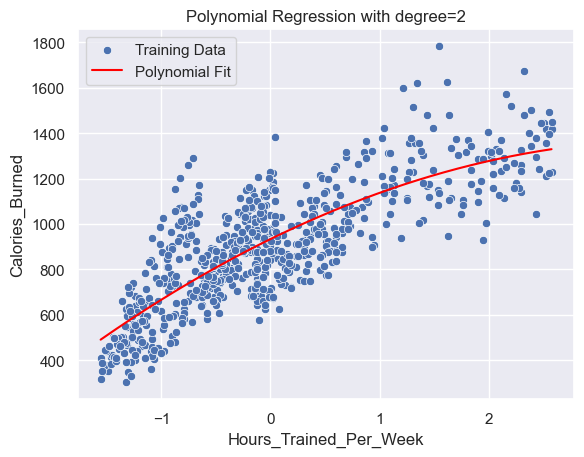

/Users/adityagoyal/dsprojects/fitnessdataset/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


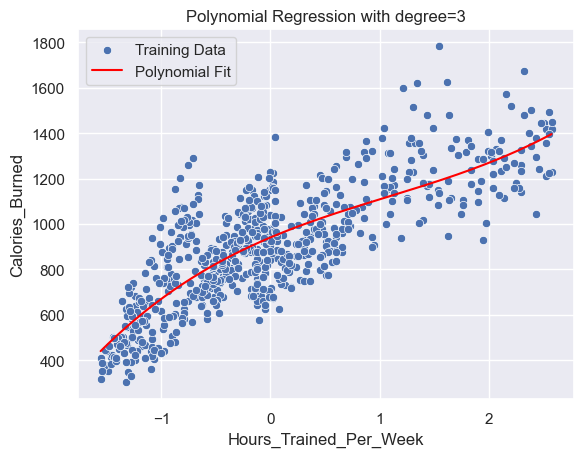

In [586]:
for i in range(2,4):
    poly = PolynomialFeatures(degree=i, include_bias=True)
    X_train_poly = poly.fit_transform(X_train[['Hours_Trained_Per_Week']])
    X_test_poly = poly.transform(X_test[['Hours_Trained_Per_Week']])

    regression = LinearRegression()
    #Training
    regression.fit(X_train_poly, y_train)
    sns.set()
    sns.set_palette('deep')
    # Plot actual training data
    sns.scatterplot(x=X_train['Hours_Trained_Per_Week'], y=y_train, label='Training Data')
    
    # Create smooth curve for plotting
    x_range = np.linspace(X_train['Hours_Trained_Per_Week'].min(),
                          X_train['Hours_Trained_Per_Week'].max(), 500).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_pred = regression.predict(x_range_poly)
    
    # Plot prediction line
    sns.lineplot(x=x_range.flatten(), y=y_pred, color = "red",label='Polynomial Fit')
    
    # Labels and title
    plt.title(f'Polynomial Regression with degree={i}')
    plt.xlabel('Hours_Trained_Per_Week')
    plt.ylabel('Calories_Burned')
    plt.legend()
    plt.show()

### Neural Network

In [587]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

In [588]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using mps device


In [589]:
class FitnessDataset(Dataset):
    def __init__(self, x, y=None):
        self.x = torch.tensor(x.values, dtype=torch.float32).to(device)
        self.y = torch.tensor(y.values, dtype=torch.float32).to(device) if y is not None else None

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx] if self.y is not None else torch.empty((1,1), dtype=torch.float32)

In [590]:
TARGET = 'Calories_Burned'
FEATURES = [col for col in X_train.columns if col not in ['id', TARGET]]

print(f'Features Count: {len(FEATURES)}')

train_dataset = FitnessDataset(X_train[FEATURES], y_train)
test_dataset = FitnessDataset(X_test[FEATURES])

Features Count: 6


In [591]:
batch_size = 64

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=False)

In [592]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(6, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.ReLU(),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [593]:
learning_rate = 0.005
epochs = 100

In [594]:
model = NeuralNetwork().to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=6, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): ReLU()
  )
)


In [595]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    loss_history = []
    score_history = []
    
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X).squeeze(1)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 2.0)
        optimizer.step()
        
        if batch % 1000 == 0:            
            loss, current = loss.item(), batch * len(X)
            loss_history.append(loss)

            score = mean_squared_error(y.cpu().detach().numpy().tolist(), pred.cpu().detach().numpy().tolist())
            score_history.append(score)
        
            print(f'loss: {loss:>7f}  [{current:>5d}/{size:>5d}]')
            
    return loss_history, score_history


def predict(dataloader, model):
    final_predictions = []

    model.eval()
    with torch.no_grad():
        for X, _ in dataloader:
            pred = model(X).squeeze(1)

            final_predictions.extend(pred.cpu().detach().numpy().tolist())

    return final_predictions


In [596]:
loss_history = []
score_history = []
for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    epoch_loss_history, epoch_score_history = train_loop(train_dataloader, model, loss_fn, optimizer)
    loss_history.extend(epoch_loss_history)
    score_history.extend(epoch_score_history)

Epoch 1
-------------------------------
loss: 880221.875000  [    0/  681]
Epoch 2
-------------------------------
loss: 860021.687500  [    0/  681]
Epoch 3
-------------------------------
loss: 795512.500000  [    0/  681]
Epoch 4
-------------------------------
loss: 834291.375000  [    0/  681]
Epoch 5
-------------------------------
loss: 793553.625000  [    0/  681]
Epoch 6
-------------------------------
loss: 880839.625000  [    0/  681]
Epoch 7
-------------------------------
loss: 843955.875000  [    0/  681]
Epoch 8
-------------------------------
loss: 671339.437500  [    0/  681]
Epoch 9
-------------------------------
loss: 657055.875000  [    0/  681]
Epoch 10
-------------------------------
loss: 573011.000000  [    0/  681]
Epoch 11
-------------------------------
loss: 503445.000000  [    0/  681]
Epoch 12
-------------------------------
loss: 355626.468750  [    0/  681]
Epoch 13
-------------------------------
loss: 297944.406250  [    0/  681]
Epoch 14
------------

In [597]:
import matplotlib.pyplot as plt
 

def show_plots(loss_list, score_list, title):
  plt.figure(figsize=(15, 9))
  plt.plot(loss_list, label="Loss history")
  plt.plot(score_list, label="RMSE history")
  plt.legend(loc='best')
  plt.xlabel('Time')
  plt.ylabel(title)
  plt.title(title)
  plt.show()

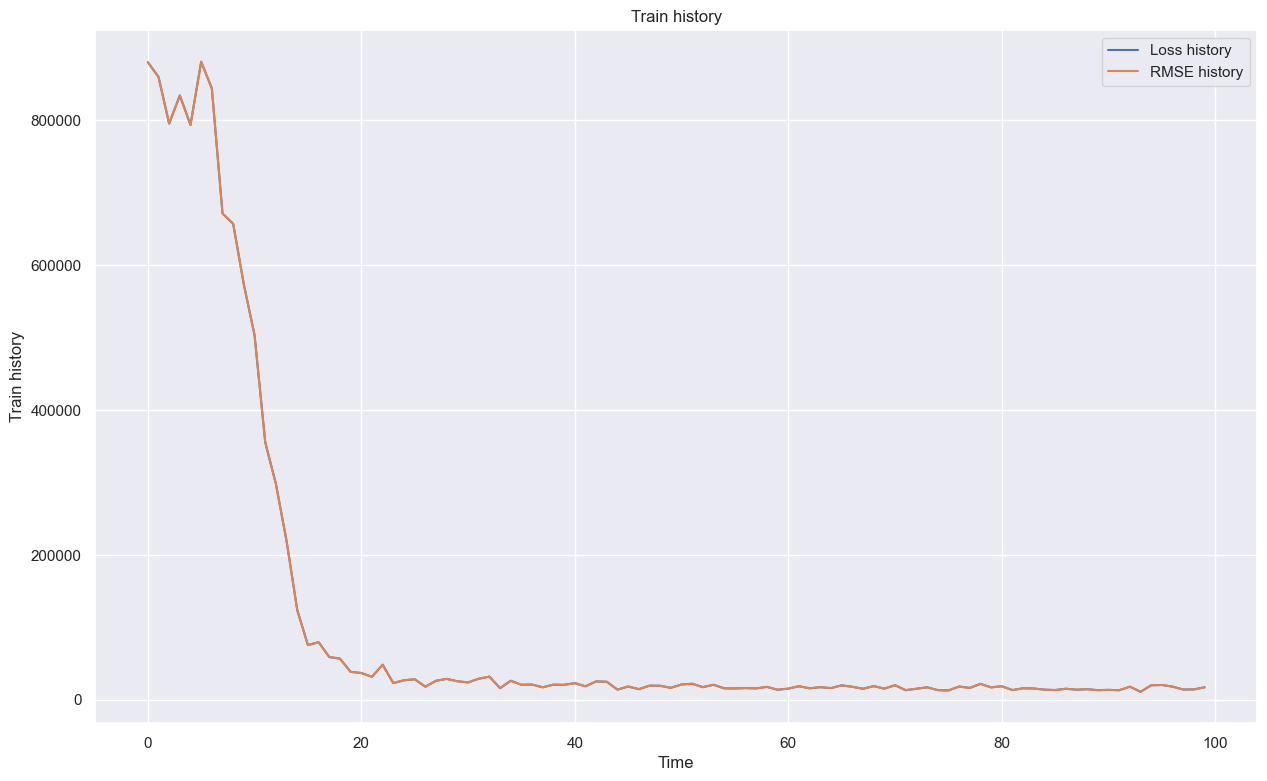

In [598]:
show_plots(loss_history, score_history, 'Train history')

In [599]:
y_test_pred = predict(test_dataloader, model)
y_train_pred = predict(train_dataloader, model)

In [600]:
predictions = pd.DataFrame({'y_test': y_test, 'y_test_pred':y_test_pred}, index=y_test.index)
predictions.head()

,y_test,y_test_pred
482,725.0,765.276855
128,500.0,767.398376
292,1054.0,715.660889
92,936.0,848.184082
308,970.0,835.738159


In [601]:
f_stat, f_p_value, r2_square_train = evaluate_model_train(y_train, y_train_pred, 
                                             X_train.shape[0], X_train.shape[1])
mae, rmse, r2_square_test = evaluate_model_test(y_test, y_test_pred)

model_list.append({
        "ModelName": f'Neural Network',
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score Train": r2_square_train,
        "R2 Score Test": r2_square_test,
        "F-Statistic": f_stat,
        "P-Value for F-Stat": f_p_value,
    })

In [602]:
metrics_data = pd.DataFrame(model_list)
metrics_data

,ModelName,MAE,RMSE,R2 Score Train,R2 Score Test,F-Statistic,P-Value for F-Stat
0,Linear Regression,110.819282,137.305143,0.770924,0.780248,378.602638,1.110223e-16
1,KNN Regressor,130.943265,160.654231,0.715625,0.699155,283.104897,1.110223e-16
2,Decision Tree Regressor,110.295949,136.541526,0.828917,0.782686,545.074330,1.110223e-16
3,Random Forest Regressor,135.581443,166.484805,0.777787,0.676922,393.771680,1.110223e-16
4,SVR,111.895015,139.155859,0.768479,0.774285,373.416271,1.110223e-16
5,Polynomial Regression (degree = 2),98.507624,121.376179,0.809658,0.828278,99.202138,1.110223e-16
6,Polynomial Regression (degree = 3),97.087017,120.568520,0.837461,0.830556,36.618681,1.110223e-16
7,Neural Network,111.219825,138.325774,-0.769543,0.776969,-48.924260,1.000000e+00
